In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.ion()

In [4]:
dx = np.linspace(0,1,10)
dy = 1- dx
x , y = 0, 0
dxy = np.hstack((dx.reshape(-1,1),dy.reshape(-1,1)))
dxy = dxy/np.linalg.norm(dxy,axis=1).reshape(-1,1)

<IPython.core.display.Javascript object>


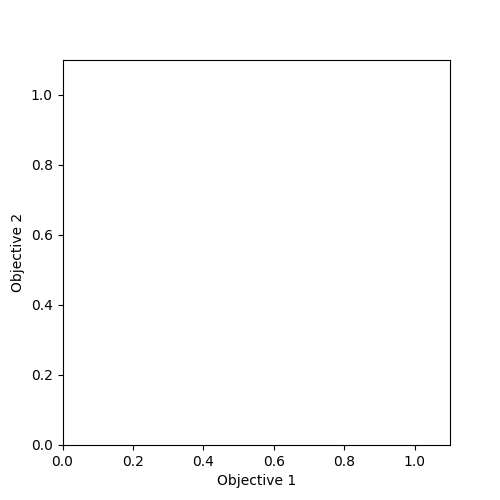

Text(0.5, 0, 'Objective 1')

In [5]:
fig, ax = plt.subplots()
ax.set_xlim([0,1.1])
ax.set_ylim([0,1.1])
fig.set_size_inches(5,5)
ax.set_ylabel('Objective 2')
ax.set_xlabel('Objective 1')

<IPython.core.display.Javascript object>


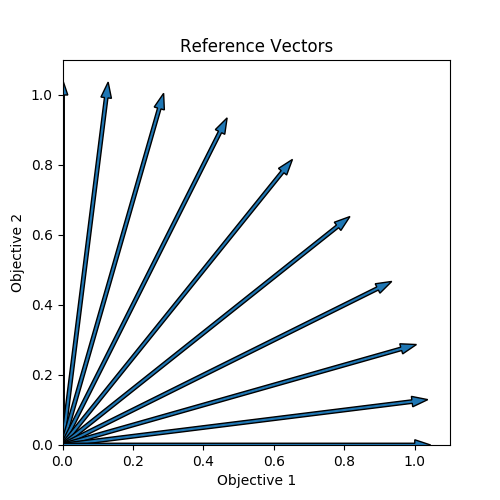

In [6]:
[ax.arrow(x, y, dx, dy, width=0.01) for (dx, dy) in dxy]
ax.set_title('Reference Vectors')
fig

In [7]:
r = 0.2
pv = [0.9, 0.1]
pv = np.asarray(pv)
newdxy = dxy*r + (1-r)*pv
newdxy = newdxy/np.linalg.norm(newdxy,axis=1).reshape(-1,1)

<IPython.core.display.Javascript object>


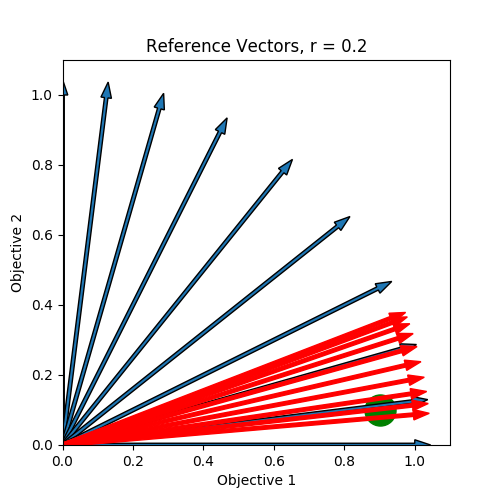

In [8]:
[ax.arrow(x, y, dx, dy, width=0.01, color='r') for (dx, dy) in newdxy]
ax.set_title('Reference Vectors, r = ' + str(r))
ax.scatter(pv[0], pv[1], color='g', s=500)
fig

<IPython.core.display.Javascript object>


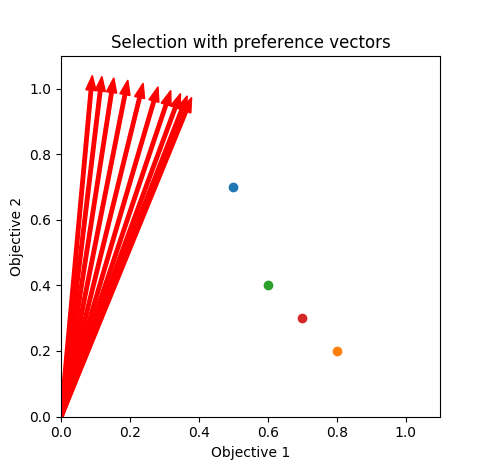

Text(0.5, 1.0, 'Selection with preference vectors')

In [133]:
fig2, ax2 = plt.subplots()
ax2.set_xlim([0,1.1])
ax2.set_ylim([0,1.1])
fig2.set_size_inches(5,5)
ax2.set_ylabel('Objective 2')
ax2.set_xlabel('Objective 1')
ax2.set_title('Selection with preference vectors')

In [134]:
r = 0.2
pv = [0.1, 0.9]
pv = np.asarray(pv)
newdxy = dxy*r + (1-r)*pv
newdxy = newdxy/np.linalg.norm(newdxy,axis=1).reshape(-1,1)

In [135]:
[ax2.arrow(x, y, dx, dy, width=0.01, color='r') for (dx, dy) in newdxy]

ax2.scatter(0.5,0.7)
ax2.scatter(0.8, 0.2)
ax2.scatter(0.6,0.4)
ax2.scatter(0.7, 0.3)

In [196]:
x = np.linspace(0,1,1000)
y = np.sqrt(1-x*x)

<IPython.core.display.Javascript object>


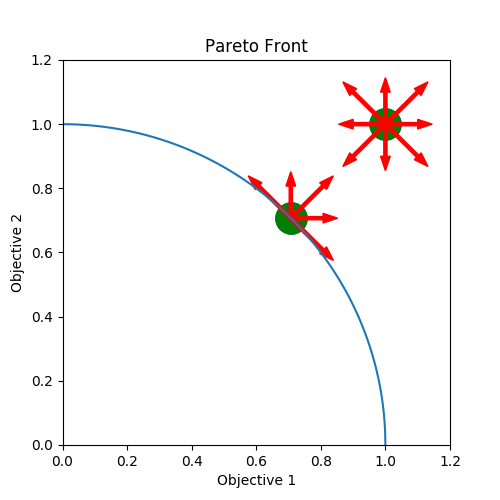

Text(0.5, 1.0, 'Pareto Front')

In [209]:
fig3, ax3 = plt.subplots()
ax3.set_xlim([0,1.2])
ax3.set_ylim([0,1.2])
fig3.set_size_inches(5,5)
ax3.set_ylabel('Objective 2')
ax3.set_xlabel('Objective 1')
ax3.set_title('Pareto Front')

In [210]:
ax3.plot(x,y)

In [211]:
free_movement = np.asarray(list(product([-1,1,0],[-1,1,0]))[:-1])/10

In [212]:
[ax3.arrow(1, 1, dx, dy, width=0.01, color='r') for (dx, dy) in free_movement]

In [213]:
ax3.scatter(1,1, color='b', s=500)

In [214]:
free_movement

array([[-0.1, -0.1],
       [-0.1,  0.1],
       [-0.1,  0. ],
       [ 0.1, -0.1],
       [ 0.1,  0.1],
       [ 0.1,  0. ],
       [ 0. , -0.1],
       [ 0. ,  0.1]])

In [215]:
restricted_movement = free_movement[[1,3,4,5,7]]

In [216]:
restricted_movement

array([[-0.1,  0.1],
       [ 0.1, -0.1],
       [ 0.1,  0.1],
       [ 0.1,  0. ],
       [ 0. ,  0.1]])

In [217]:
[ax3.arrow(0.707, 0.707, dx, dy, width=0.01, color='r') for (dx, dy) in restricted_movement]

In [219]:
ax3.scatter(0.707,0.707, color='g', s=500)

<IPython.core.display.Javascript object>


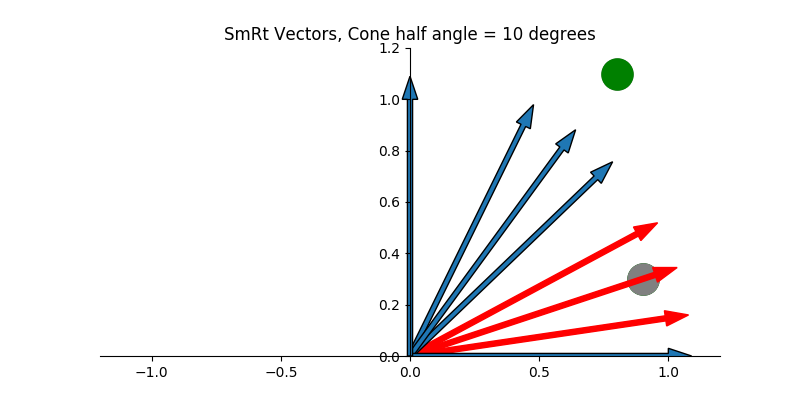

Text(0.5, 1.0, 'SmRt Vectors, Cone half angle = 10 degrees')

In [382]:
fig4, ax4 = plt.subplots()
ax4.set_xlim([-1.2,1.2])
ax4.set_ylim([0,1.2])
fig4.set_size_inches(8,4)
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.set_title('SmRt Vectors, Cone half angle = 10 degrees')

In [383]:
#spine placement data centered
ax4.spines['left'].set_position(('data', 0.0))
ax4.spines['bottom'].set_position(('data', 0.0))
ax4.spines['right'].set_color('none')
ax4.spines['top'].set_color('none')

In [347]:
low_vecs = np.asarray([[1,0], [-1,0]], dtype=float)
[ax4.arrow(0, 0, dx, dy, width=0.02, color='r') for (dx, dy) in low_vecs]

In [384]:
low_vecs = np.asarray([[1,0], [-1,0], [0,1]], dtype=float)
angle = 10 * np.pi / 180
m = 1 / np.tan(angle)
norm = np.linalg.norm(low_vecs, axis=1)
low_vecs[:, -1] += norm * m
norm = np.linalg.norm(low_vecs, axis=1)
low_vecs = low_vecs/ norm[:, np.newaxis]


In [378]:
[ax4.arrow(0, 0, dx, dy, width=0.02, color='r') for (dx, dy) in low_vecs]

In [385]:
ref_point = [0.9, 0.3]
ax4.scatter(ref_point[0], ref_point[1], color='gray', s=500)

In [304]:
def rotate(initial_vector, rotated_vector, other_vectors):
    """Calculate the rotation matrix that rotates the initial_vector to the
    rotated_vector. Apply that rotation on other_vectors and return.
    Uses Householder reflections twice to achieve this."""

    init_vec_norm = normalize(initial_vector)
    rot_vec_norm = normalize(np.asarray(rotated_vector))
    middle_vec_norm = normalize(init_vec_norm + rot_vec_norm)
    first_reflector = init_vec_norm - middle_vec_norm
    second_reflector = middle_vec_norm - rot_vec_norm
    Q1 = householder(first_reflector)
    Q2 = householder(second_reflector)
    reflection_matrix = np.matmul(Q2, Q1)
    rotated_vectors = np.matmul(other_vectors, np.transpose(reflection_matrix))
    return normalize(rotated_vectors)

In [305]:
def householder(vector):
    """Return reflection matrix via householder transformation."""
    identity_mat = np.eye(len(vector))
    v = vector[np.newaxis]
    denominator = np.matmul(v, v.T)
    numerator = np.matmul(v.T, v)
    rot_mat = identity_mat - (2 * numerator / denominator)
    return rot_mat

In [306]:
def normalize(vectors):
    """
    Normalize a set of vectors.

    The length of the returned vectors will be unity.

    Parameters
    ----------
    vectors : np.ndarray
        Set of vectors of any length, except zero.

    """
    if len(np.asarray(vectors).shape) == 1:
        return vectors / np.linalg.norm(vectors)
    norm = np.linalg.norm(vectors, axis=1)
    return vectors / norm[:, np.newaxis]

In [386]:
low_vecs = rotate([0,1], ref_point, low_vecs)
[ax4.arrow(0, 0, dx, dy, width=0.02, color='r') for (dx, dy) in low_vecs]

In [388]:
ref_new = [0.8, 1.1]
low_vecs = rotate(ref_point, ref_new, low_vecs)

In [389]:
low_vecs = np.vstack((low_vecs, ([1,0], [0,1])))

In [390]:
[ax4.arrow(0, 0, dx, dy, width=0.02) for (dx, dy) in low_vecs]

In [394]:
ax4.scatter(ref_new[0], ref_new[1], color='g', s=500)